___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [64]:
!python --version

Python 3.9.7


In [65]:
#!pip install tensorflow

In [66]:
#!pip install tensorflow==2.0

In [67]:
#!pip install --ignore-installed --upgrade tensorflow==2.6

In [68]:
import tensorflow as tf
tf.__version__

'2.8.0'

# Keras Syntax Basics

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [70]:
#from google.colab import drive
#drive.mount('/content/drive')

In [71]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [72]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [73]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


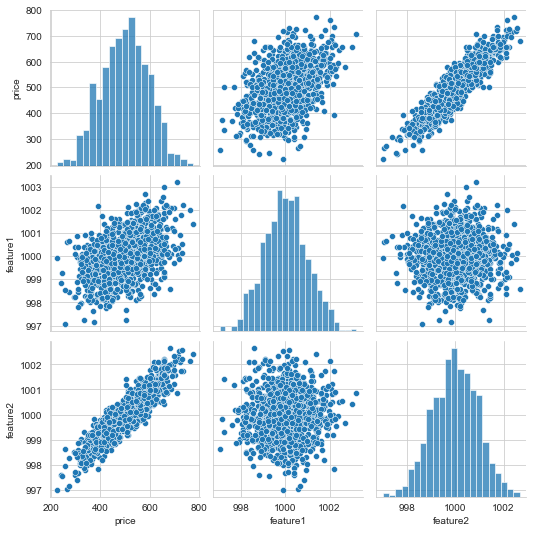

In [76]:
sns.pairplot(df);

In [77]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [80]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [81]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [83]:
X_train.shape

(700, 2)

In [84]:
X_test.shape

(300, 2)

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [87]:
scaler = MinMaxScaler()

In [88]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
X_train.max()

1.0

In [90]:
X_train.min()

0.0

In [91]:
X_test.max()

1.0186515935232023

In [92]:
X_test.min()

-0.014108392024525074

## Modelling

In [93]:
import tensorflow as tf

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [95]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [96]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kern

In [97]:
# First way to create model

model = Sequential([Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [98]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1]
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [99]:
model.compile(optimizer = "rmsprop", loss = "mse")

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [100]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 3ms/step - loss: 256670.6719
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256603.4062
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256527.5625
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256437.0781
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 256331.3438
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 256206.7500
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 256060.3438
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255888.2031
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 255684.4531
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255447.9062
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255175.6562
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 1719.2192
Epoch 97/250
22/22 [==============================] - 0s 2ms/step - loss: 1685.6129
Epoch 98/250
22/22 [==============================] - 0s 2ms/step - loss: 1653.8102
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 1620.9036
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 1589.4425
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 1557.7133
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 1525.6752
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 1490.7606
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 1462.4935
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 1432.1554
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 1400.8204
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 1369.35

22/22 [==============================] - 0s 1ms/step - loss: 26.7600
Epoch 194/250
22/22 [==============================] - 0s 953us/step - loss: 26.4503
Epoch 195/250
22/22 [==============================] - 0s 953us/step - loss: 25.8413
Epoch 196/250
22/22 [==============================] - 0s 952us/step - loss: 25.4931
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 25.5350
Epoch 198/250
22/22 [==============================] - 0s 1ms/step - loss: 25.1960
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 25.0875
Epoch 200/250
22/22 [==============================] - 0s 905us/step - loss: 25.0603
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 24.2004
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 24.6256
Epoch 203/250
22/22 [==============================] - 0s 953us/step - loss: 24.5857
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 24.3776
Epoch 20

In [101]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 4)                 12        
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.weights

[<tf.Variable 'dense_28/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 2.3422904,  1.1023337, -0.6962831,  1.4585657],
        [ 2.7235098,  3.3118746, -0.2766049,  3.725849 ]], dtype=float32)>,
 <tf.Variable 'dense_28/bias:0' shape=(4,) dtype=float32, numpy=array([0.7169893, 0.6165079, 0.       , 0.7121613], dtype=float32)>,
 <tf.Variable 'dense_29/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.11164959,  2.011563  , -0.20083767,  2.7172036 ],
        [-0.8273667 ,  2.8831513 , -0.20567954,  2.4102495 ],
        [ 0.7318317 , -0.04549295, -0.10689372,  0.23394686],
        [-0.01345687,  2.4547179 , -0.81341183,  3.0476642 ]],
       dtype=float32)>,
 <tf.Variable 'dense_29/bias:0' shape=(4,) dtype=float32, numpy=array([-0.11107895,  0.6750578 ,  0.        ,  0.69800717], dtype=float32)>,
 <tf.Variable 'dense_30/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.33213717, -0.42172158,  0.37181494, -0.2984311 ],
        [-0.29167968,  0.21777938,  1.4659543 ,  2

In [103]:
model.history.history

{'loss': [256670.671875,
  256603.40625,
  256527.5625,
  256437.078125,
  256331.34375,
  256206.75,
  256060.34375,
  255888.203125,
  255684.453125,
  255447.90625,
  255175.65625,
  254866.0625,
  254514.8125,
  254119.109375,
  253673.296875,
  253178.421875,
  252624.234375,
  252008.984375,
  251333.078125,
  250589.84375,
  249770.3125,
  248874.1875,
  247900.046875,
  246841.125,
  245690.171875,
  244453.8125,
  243116.0625,
  241658.875,
  240107.125,
  238445.84375,
  236657.6875,
  234756.28125,
  232728.5,
  230570.8125,
  228284.890625,
  225846.953125,
  223278.21875,
  220557.46875,
  217682.234375,
  214667.640625,
  211503.265625,
  208165.34375,
  204684.1875,
  201016.796875,
  197206.125,
  193209.546875,
  189045.34375,
  184731.25,
  180266.875,
  175646.5,
  170830.9375,
  165889.21875,
  160790.875,
  155519.703125,
  150082.109375,
  144536.109375,
  138842.703125,
  133066.3125,
  127165.390625,
  121133.828125,
  115037.2890625,
  108867.828125,
  102607.2

In [104]:
pd.DataFrame(model.history.history)

,loss
0,256670.672
1,256603.406
2,256527.562
3,256437.078
4,256331.344
...,...
245,24.330
246,24.341
247,24.065
248,24.308


<AxesSubplot:>

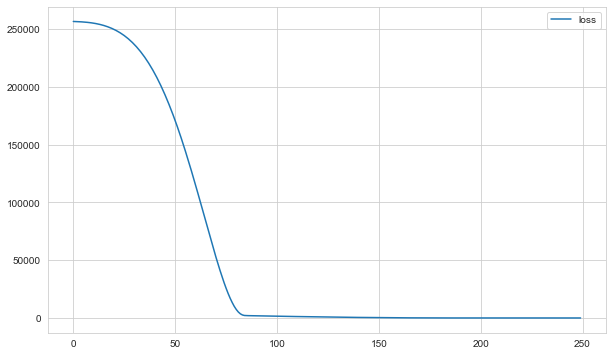

In [105]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

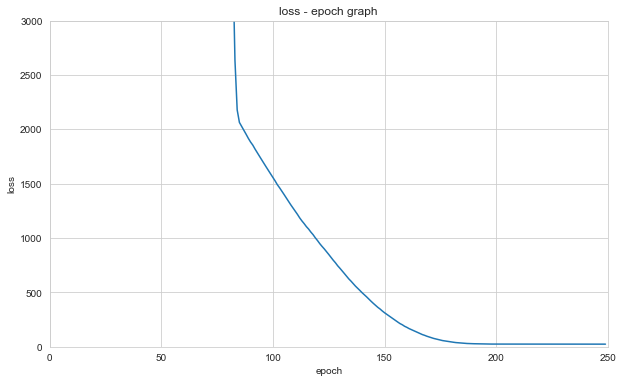

In [106]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [131]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [133]:
model.evaluate(X_train, y_train, verbose=0)

23.891042709350586

In [134]:
model.evaluate(X_test, y_test, verbose=0)

25.6693058013916

In [135]:
y_pred = model.predict(X_test)

In [136]:
explained_variance_score(y_test, y_pred)

0.997154719961019

In [139]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
61,477.737,475.218
190,433.423,438.380
241,496.890,503.905
98,537.607,537.119
52,531.662,542.686
262,722.264,722.017
137,625.079,631.574
177,484.020,490.492
34,424.811,425.353
60,492.936,491.847


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

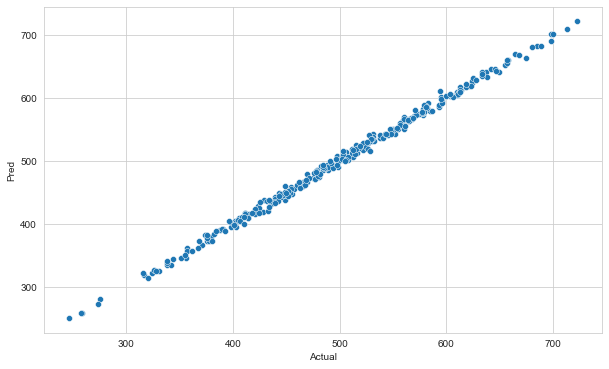

In [140]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [141]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [142]:
eval_metric(y_test, y_pred)

r2_score: 0.9970803895036493 
mae: 4.08870015195613 
mse: 25.66930793458626 
rmse: 5.066488718489982


## Final Model and Model Deployment

In [116]:
scaler = MinMaxScaler().fit(X)

In [117]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [118]:
X_scaled = scaler.transform(X)

In [119]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 257333.4375
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 257147.7188
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 256951.3281
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 256719.0312
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 256440.4375
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 256104.5312
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 255706.8125
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 255238.0938
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 254690.0938
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 254058.9062
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 253329.4844
Epoch 12/250
32/32 [==============================] - 0s 1ms/st

32/32 [==============================] - 0s 1ms/step - loss: 517.2019
Epoch 98/250
32/32 [==============================] - 0s 1ms/step - loss: 492.5210
Epoch 99/250
32/32 [==============================] - 0s 1ms/step - loss: 468.3921
Epoch 100/250
32/32 [==============================] - 0s 1ms/step - loss: 444.4426
Epoch 101/250
32/32 [==============================] - 0s 1ms/step - loss: 420.4579
Epoch 102/250
32/32 [==============================] - 0s 1ms/step - loss: 399.5879
Epoch 103/250
32/32 [==============================] - 0s 903us/step - loss: 379.8953
Epoch 104/250
32/32 [==============================] - 0s 903us/step - loss: 359.9249
Epoch 105/250
32/32 [==============================] - 0s 1ms/step - loss: 337.8541
Epoch 106/250
32/32 [==============================] - 0s 903us/step - loss: 318.3038
Epoch 107/250
32/32 [==============================] - 0s 968us/step - loss: 299.6942
Epoch 108/250
32/32 [==============================] - 0s 936us/step - loss: 279.958

32/32 [==============================] - 0s 1ms/step - loss: 24.6976
Epoch 196/250
32/32 [==============================] - 0s 968us/step - loss: 24.8751
Epoch 197/250
32/32 [==============================] - 0s 936us/step - loss: 24.5724
Epoch 198/250
32/32 [==============================] - 0s 936us/step - loss: 24.4429
Epoch 199/250
32/32 [==============================] - 0s 968us/step - loss: 24.5373
Epoch 200/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5871
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.9922
Epoch 202/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5381
Epoch 203/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5612
Epoch 204/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7760
Epoch 205/250
32/32 [==============================] - 0s 1ms/step - loss: 24.7528
Epoch 206/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5740
Epoch 207/

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [149]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [150]:
from tensorflow.keras.models import load_model

In [151]:
model_fake_reg = load_model('model_fake_reg.h5')

In [152]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [153]:
sample = [[998, 1000]]

In [154]:
sample_scaled = scaler_fake_reg.transform(sample)

In [155]:
model_fake_reg.predict(sample_scaled)

array([[418.94302]], dtype=float32)

## Prediction-2

In [160]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [161]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [162]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [163]:
model_fake_reg.predict(sample_scaled)

array([[378.86462],
       [330.58612],
       [282.30756],
       [234.02904],
       [185.75049]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___